# Лабораторная работа №3: Регрессионный анализ
Выполнил студент гр. 1384 Соломин Данил

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

1. **Линейная регрессионная модель**: Это метод предсказания значения зависимой переменной $y$ на основе набора независимых переменных $x = (x_1, …, x_n)$. Здесь, отношение между $y$ и $x$ выражается через уравнение: $y =\beta_0 + \beta_1 x_1 + … + \beta_n x_n + \varepsilon$, где $\beta_0, \beta_1, …, \beta_n$ - коэффициенты регрессии, а $\varepsilon$ - случайная ошибка.

2. **Метод Наименьших Квадратов (МНК)**: Этот метод минимизирует сумму квадратов разностей между наблюдаемыми и предсказанными значениями (RSS). Он включает решение системы уравнений для определения коэффициентов регрессии ($\beta$) и использует производную RSS для оптимизации этих коэффициентов.

3. **Несмещенная оценка дисперсии**: Рассчитывается как отношение суммы квадратов ошибок (RSS) к числу степеней свободы ($n-r$), где $r$ - ранг матрицы $X$.

4. **Доверительный интервал**: Включает оценку параметра ($\hat{\psi}$), элемент дисперсии оценки и соответствующее распределение. Доверительный интервал определяется на основе этих элементов и уровня значимости $\alpha$.

5. **Уравнение доверительного эллипсоида**: Описывает область, в которой с определенной вероятностью находятся оценки параметров. Это уравнение использует вектор оценок параметров, матрицу ковариации, оценку дисперсии и значение функции распределения хи-квадрат.

6. **Критерий $\chi^2$**: Проверяет гипотезу, сравнивая теоретическую плотность распределения со статистическими данными. Основывается на разбиении множества значений на интервалы и сравнении частоты попадания в эти интервалы с теоретической вероятностью.

7. **Теорема Колмогорова**: Описывает сходимость распределения максимальной разницы между эмпирической и теоретической функциями распределения. Гипотеза проверяется на основе распределения Колмогорова.

8. **$\mathbb{F}$-критерий**: Используется для оценки значимости регрессии. Сравнивает среднеквадратичное отклонение объясненных отклонений (MSR) и среднеквадратичное отклонение остатков (MSE).

## Постановка задачи

Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Результаты статистического эксперимента приведены в таблицу 1. Требуется оценить характей (случайной) зависимости переменной Y от переменной X.

1. Построить графически результаты эксперемента. Сформулировать линейную регрессионную модаль переменной Y от переменной X. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответситвие полученных данных и построенной оценки.

Имеем линейную зависимость $Y = \beta_0 + \beta_1 X + ϵ$, где $ϵ$ - неустранимая ошибка.

Чтобы оценить вектор $\beta = (\beta_0, \beta_1)$ необходимо решить $\hat{\beta} = (XX^{\intercal})^{-1}XY$, где матрица X представляет собой строку едениц и строку координат X.

Решим задачу на python с помощью встроенных механизмов и явно. Сравним результаты.

Визуально полученая линия хорошо описывает данные




In [373]:
import numpy as np
tableX = np.array([2,1,0,2,0,1,1,0,0,2,2,2,0,0,0,0,1,0,0,0,0,2,2,0,1,1,1,0,0,1,2,1,1,1,0,1,1,1,1,1,1,0,2,1,1,0,2,1,2,1])
tableY = np.array([10.95,12.29,12.57,11.16,11.08,13.41,11.07,15.08,14.44,13.83,13.79,12.78,9.73,9.1,11.15,9.61,12.18,12.22,14.17,12.79,14.61,11.92,15.79,11.74,10.07,12.31,12.83,10.14,14.14,15.15,12.7,11.76,11.59,7.57,10.67,12.97,11.22,12.12,15.73,11.49,12.25,11.55,9.6,11.76,9.78,13.16,11.18,12.91,13.17,14.28])
alpha = 0.1
h = 1.3
n = len(tableX)


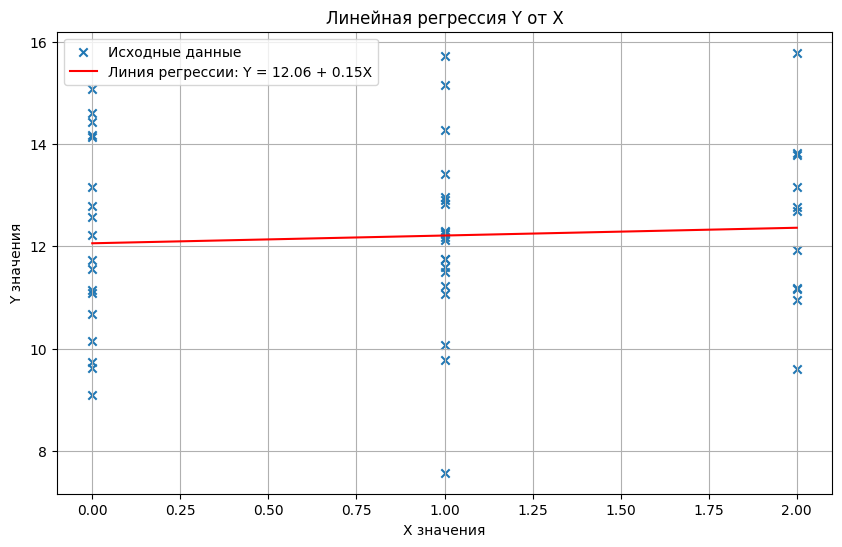

Решение через LinearRegression  12.060499643112061 0.15197715917201982
Явное решение [12.06049964  0.15197716]


In [374]:

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Преобразование данных
X_array = np.array(tableX).reshape(-1, 1)
Y_array = np.array(tableY)

model = LinearRegression()
model.fit(X_array, Y_array)

# Получение параметров регрессии (β0 и β1)
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Создание линии регрессии
X_fit = np.linspace(min(tableX), max(tableX), n)
Y_fit = model.predict(X_fit.reshape(-1, 1))


# График
plt.figure(figsize=(10, 6))


plt.scatter(tableX, tableY, label='Исходные данные', marker='x')
plt.plot(X_fit, Y_fit, color='red', label=f'Линия регрессии: Y = {beta_0:.2f} + {beta_1:.2f}X')
plt.title('Линейная регрессия Y от X')
plt.xlabel('X значения')
plt.ylabel('Y значения')
plt.legend()
plt.grid(True)
plt.show()

print("Решение через LinearRegression ", beta_0, beta_1)


# Явное решение через формулы
X = np.array([[1] * n, tableX])

print("Явное решение", np.linalg.inv(X.dot(X.transpose())).dot(X).dot(tableY))


2. Построить и интерпретировать несмещенную оценку дсперcии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $χ^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Для того, чтобы оценить $\sigma^2$ можем воспользоваться формулой

$s^2 = \frac{RSS(\hat{\beta})}{n - r}$, где $r = m = rank(X) = 2$

Но проще будет посчитать выборочную дисперсию от $Y - Y_{fit}$ с ddof = 2 (Delta Degrees of Freedom).

После строим гистограмму и по аналогии с прошлой лаб. работой проверяем гипотезу о нормальности ошибок $(Y - Y_{fit})$



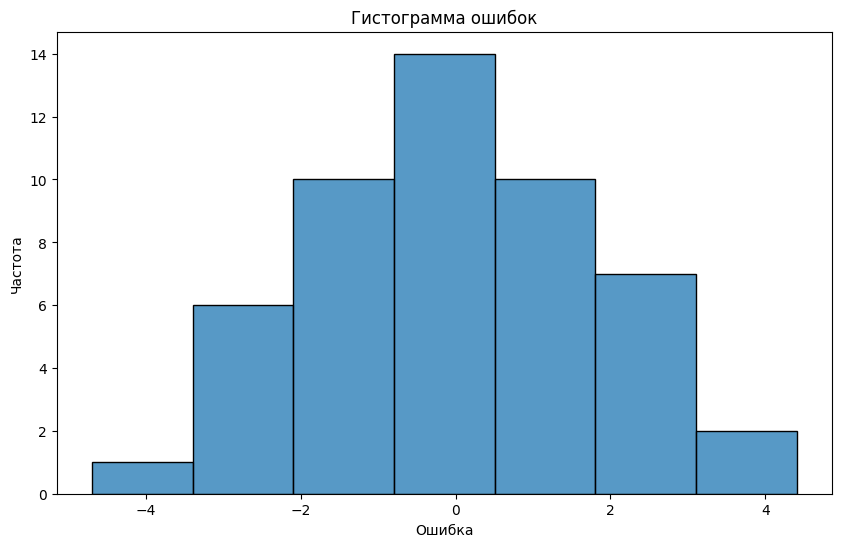

(3.230119315556087,
 5.29238946928608,
 0.5068954272314186,
 0.08211363906963204,
 0.8614188617319015)

In [375]:
from scipy.stats import chi2, norm, kstest
import seaborn as sns

# Расчет ошибок
errors = (tableY - Y_fit)

# Несмещенная оценка дисперсии
var_unbiased = np.var(errors, ddof=2)

# Гистограмма ошибок с шагом h = 1.3

plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=np.arange(min(errors), max(errors) + h, h))
plt.title('Гистограмма ошибок')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.show()


# Проверка гипотезы нормальности ошибок (χ^2 тест)
# Разделение на интервалы
bins = np.arange(min(errors), max(errors) + h, h)
observed_freq, bins = np.histogram(errors, bins=bins)
expected_freq = len(errors) * norm.pdf((bins[:-1] + bins[1:]) / 2, loc=np.mean(errors), scale=np.sqrt(var_unbiased))


# Вычисление χ^2 статистики и p-значения
chi2_stat = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
p_value_chi2 = chi2.sf(chi2_stat, df=len(observed_freq) - 1)

# Колмогоров-Смирнов тест
ks_stat, p_value_ks = kstest(errors, 'norm', args=(np.mean(errors), np.sqrt(var_unbiased)))

var_unbiased, chi2_stat, p_value_chi2, ks_stat, p_value_ks



Оценив визуально можно видеть, что данные хорошо аппроксимируют нормальное распределение. Это подтверждают данные $p\_value = 0.5$ по $\chi^2$ и $p\_value = 0.86$ по Колмогорову. Эти числа больше уровня значимости, что не дает оснований для опровержения гипотезы о нормальности распределения ошибок. Принимаем эту гипотезу.

3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1 - α$. Построить доверительный эллипс уровня $1 - α$ для $(\beta_0, \beta_1)$ (вычислить его полуоси)


Построим доверительный интервал для параметров.

Для этого будем использовать формулы

$ψ_{\beta_0} = \left(\begin{array}{cc} 1&&0 \end{array}\right) \left(\begin{array}{cc} \beta_0 \\ \beta_1 \end{array}\right) $

$ψ_{\beta_1} = \left(\begin{array}{cc} 0 && 1 \end{array}\right) \left(\begin{array}{cc} \beta_0 \\ \beta_1 \end{array}\right)$

$b_{\psi} = C^{\intercal}(XX^{\intercal})^{-1}C$

Используя то, что

$\frac{\hat{ψ} - ψ}{s\sqrt{b}} \sim S_{n - r}$

Можем построить доверительный интервал

$P(S_{n-r} \in [-x_{α}, x_{α}])$

$x_{α}:$ $S(x_{\alpha}) = 1 - \alpha/2$

$P(\hat{ψ}-x_{α} s\sqrt{b}  ≤ ψ  ≤ \hat{ψ} +  x_{α}s\sqrt{b})$

$ψ \in [\hat{ψ}-x_{α} s\sqrt{b}, \hat{ψ} + x_{α} s\sqrt{b}]$


In [376]:
from scipy.stats import nct, f, t

# Вычисляем x_alpha и данные для построения интервала

level_x_a = nct.ppf(1 - alpha / 2, n - 2, 0)
std = np.sqrt(var_unbiased)

XX_inv = np.linalg.inv(X.dot(X.transpose()))
XX_T = X.dot(X.transpose())

C_0 = np.array([1, 0])
C_1 = np.array([0, 1])

b_0 = C_0.dot(XX_inv).dot(C_0.transpose())
b_1 = C_1.dot(XX_inv).dot(C_1.transpose())

# Отклонение от оценки
err_0 = level_x_a * std * np.sqrt(b_0)
err_1 = level_x_a * std * np.sqrt(b_1)

# Выод
(beta_0 - err_0, beta_0 + err_0), (beta_1 - err_1, beta_1 + err_1)

((11.411210692719067, 12.709788593505056),
 (-0.4174869216175997, 0.7214412399616393))

Построим доверительный элипс уровня $1 - α$

$ A_\alpha = \{x: (x - \widehat \psi)^T (C^T (XX^T)^{-1}C)^{-1}(x - \widehat \psi) \le qs^2x_\alpha\}$, где

$ x_\alpha = F_{q, n-r}(x_\alpha) = 1 - \alpha$


$C = \begin{pmatrix}
    1 & 0\\
    0 & 1
\end{pmatrix} $

Тогда $ \begin{pmatrix}
    x\\
    y
\end{pmatrix}  = P(\widehat \psi - \psi)$, где P - eigen векторов.

Тогда уравнение доверительного эллипсоида выглядит таким образом:

$(\widehat \psi -  \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\widehat \psi -  \psi) = \lambda_1 x^2 + \lambda_2 y^2 \le qs^2x_\alpha$

Приведем это уравнение

$\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2 \le 1$

Где $q = 2$ в нашем случае

для того, чтобы сместить эллипс нужно использовать переход

$ \begin{pmatrix}
    x\\
    y   
\end{pmatrix}  = P(\widehat \psi - \psi)$, где P - матрица eigen vectors.

$\begin{pmatrix} -0.76544908 && -0.64349647 \\ 0.64349647 && -0.76544908 \end{pmatrix} \cdot \begin{pmatrix} 12.06049964 - \beta_0 \\ 0.15197716 - \beta_1 \end{pmatrix} = $

$ \begin{pmatrix} -0.765449\cdot(12.0605 - \beta_0) - 0.643496 \cdot(0.151977 - \beta_1) \\ 0.643496 \cdot (12.0605 - \beta_0) - 0.765449 \cdot(0.151977 - \beta_1) \end{pmatrix}$

[[-0.76544908 -0.64349647]
 [ 0.64349647 -0.76544908]]
[12.06049964  0.15197716]


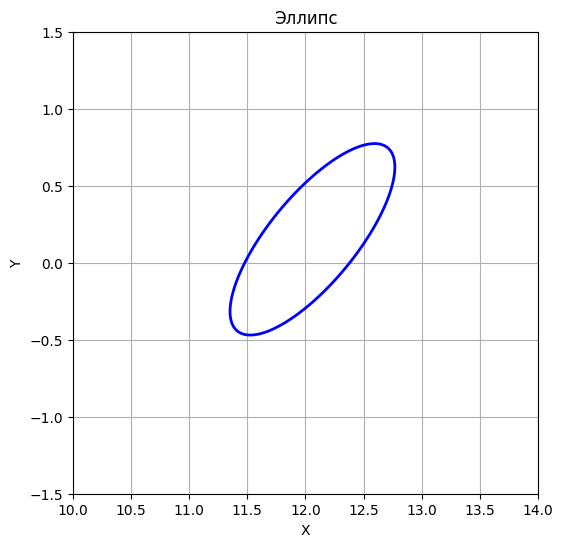

In [377]:
eigenvalues, eigenvectors = np.linalg.eig(XX_T)


a = np.sqrt((2 * var_unbiased * level_x_a) / eigenvalues[0])
b =  np.sqrt((2 * var_unbiased * level_x_a) / eigenvalues[1])

print(eigenvectors)
print(np.array([beta_0, beta_1]))

# Создание сетки значений x и y
x = np.linspace(10, 14, 200)
y = np.linspace(-1.5, 1.5, 200)
X, Y = np.meshgrid(x, y)

# Расчет значения уравнения эллипса для каждой точки сетки
def gen(b1, b2):
  return (( -0.765449 * (12.0605 - b1) - 0.643496 * (0.151977 - b2))**2 / a**2) + ((0.643496 * (12.0605 - b1) - 0.765449 * (0.151977 - b2))**2 / b**2)

# Создание графика
plt.figure(figsize=(6, 6))
plt.contour(X, Y, gen(X, Y), levels=[1], colors='blue', linewidths=2) # Построение контура, где значение равно 1

plt.title("Эллипс")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


4. Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.

Пусть
Нулевая гипотеза (H0): Переменная Y не зависит от переменной X.
Альтернативная гипотеза (H1): Переменная Y зависит от переменной X

Для проверки гипотезы можно воспользоватия корреляцией Пирсона. Коэффициент корреляции Пирсона $r$ между двумя перменными X и Y можно расчитать по формуле

$r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}$

Если значение $r$

+1 - Полная положительная корреляция

-1 - Полная отрицательная корреляция

0 - Отсутствие линейной корреляции


In [378]:
import scipy.stats as stats
stats.pearsonr(tableX, tableY)

PearsonRResult(statistic=0.06480669987051485, pvalue=0.6547793191934902)

Так как $p\_value$ больше установленного уровня значимости, мы не отклоняем нулевую гепотизу. Это означает, что на основе данных нельзя утверждать о наличии значимой зависимости между переменными X и Y.  Это подтверждает и коэффициен корреляции близкий к нулю

5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Можем по аналогии использовать функции из LinearRegression, но воспользуемся явным перемножением матриц

[12.10833333 -0.12291126  0.14505411]


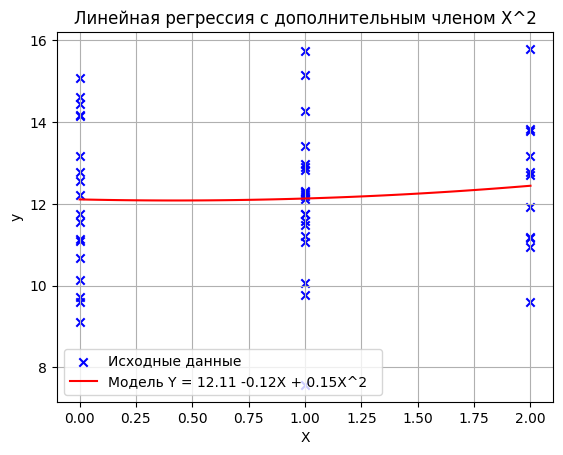

In [379]:
X_2 = np.array([[1] * n, tableX, [i**2 for i in tableX]])
Y_2 = np.array(tableY)

XX_T_2 = np.dot(X_2, X_2.T)
XX_T_inv_2 = np.linalg.inv(XX_T_2)

beta_hat = np.dot(XX_T_inv_2, X_2).dot( Y_2)

beta_0 = beta_hat[0]
beta_1 = beta_hat[1]
beta_2 = beta_hat[2]

print(beta_hat)

# Строим графики

X_range = np.linspace(tableX.min(), tableX.max(), n).reshape(-1, 1)

# Предсказание значений
Y_range = beta_0 + beta_1 * X_range + beta_2 * X_range**2

# Расчет ошибок
Y_fit_2 = (Y_range.reshape(1, -1)[0])

# Визуализация
plt.scatter(tableX, tableY, color='blue', label='Исходные данные', marker="x")
plt.plot(X_range, Y_range, color='red', label=f'Модель Y = {beta_hat[0]:.2f} {beta_hat[1]:.2f}X + {beta_hat[2]:.2f}X^2  ')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Линейная регрессия с дополнительным членом X^2')
plt.grid(True)
plt.legend()
plt.show()

6. Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок, как в пункте 2.

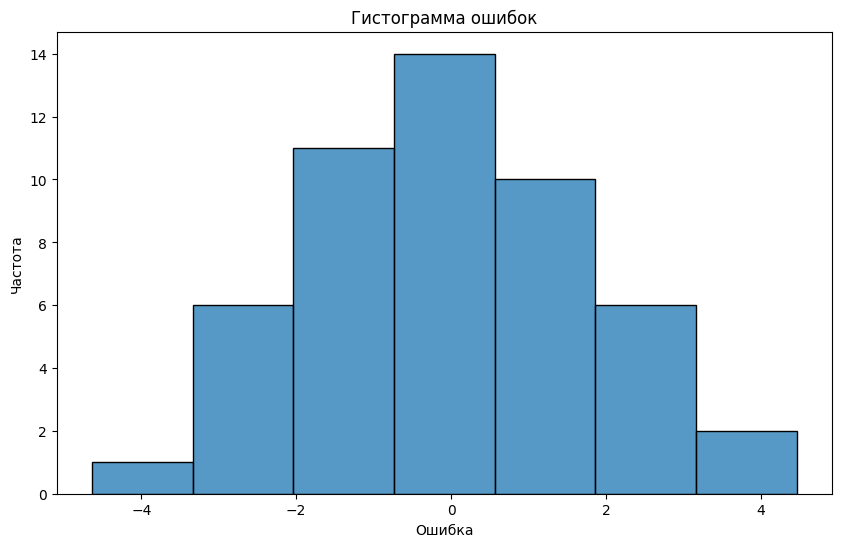

(3.30306658916071,
 4.79448184529886,
 0.5704297699155392,
 0.09436409670221713,
 0.7292244221696151)

In [380]:
# Расчет ошибок
errors = tableY - Y_fit_2
r_2 = 3;

# Несмещенная оценка дисперсии
var_unbiased_2 = np.var(errors, ddof = r_2)

# Построение гистограммы ошибок

plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=np.arange(min(errors), max(errors) + h, h))
plt.title('Гистограмма ошибок')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.show()



# Проверка гипотезы нормальности ошибок (χ^2 тест)
# Разделение на интервалы
bins = np.arange(min(errors), max(errors) + h, h)
observed_freq, bins = np.histogram(errors, bins=bins)
expected_freq = len(errors) * norm.pdf((bins[:-1] + bins[1:]) / 2, loc=np.mean(errors), scale=np.sqrt(var_unbiased))

# Вычисление χ^2 статистики и p-val
chi2_stat = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
p_value_chi2 = chi2.sf(chi2_stat, df=len(observed_freq) - 1)

# Колмогоров тест
ks_stat, p_value_ks = kstest(errors, 'norm', args=(np.mean(errors), np.sqrt(var_unbiased_2)))

var_unbiased_2, chi2_stat, p_value_chi2, ks_stat, p_value_ks




7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1 - α$. Написать уравнение доверительного эллипсоида уровня доверия $1 - α$

По аналогии с пунктом 3, найдем доверительные интервалы для всех трех $\beta$. Повторим формулы тут.


$b_{\psi} = C^{\intercal}(XX^{\intercal})^{-1}C$

$P(S_{n-r} \in [-x_{α}, x_{α}])$

$x_{α}:$ $S(x_{\alpha}) = 1 - \alpha/2$

$P(\hat{ψ}-x_{α} s\sqrt{b}  ≤ ψ  ≤ \hat{ψ} +  x_{α}s\sqrt{b})$

$ψ \in [\hat{ψ}-x_{α} s\sqrt{b}, \hat{ψ} + x_{α} s\sqrt{b}]$




In [381]:
from scipy.stats import nct, f, t

# Вычисляем x_alpha и данные для построения интервала

level_x_a_2 = nct.ppf(1 - alpha / 2, n - r_2, 0)
std = np.sqrt(var_unbiased_2)


C_0 = np.array([1, 0, 0])
C_1 = np.array([0, 1, 0])
C_2 = np.array([0, 0, 1])

b_0 = C_0.dot(XX_T_inv_2).dot(C_0.transpose())
b_1 = C_1.dot(XX_T_inv_2).dot(C_1.transpose())
b_2 = C_2.dot(XX_T_inv_2).dot(C_2.transpose())

# Отклонение от оценки
err_0 = level_x_a_2 * std * np.sqrt(b_0)
err_1 = level_x_a_2 * std * np.sqrt(b_1)
err_2 = level_x_a_2 * std * np.sqrt(b_2)


# Выод
(beta_0 - err_0, beta_0 + err_0), (beta_1 - err_1, beta_1 + err_1), (beta_2 - err_2, beta_2 + err_2)

((11.38955429656837, 12.827112370098149),
 (-1.896368326190044, 1.650545815367528),
 (-0.7400176484672016, 1.0301258735754402))

Написать уравнение доверительного эллипсоида уровня доверия $1 - α$

Для этого по аналогии с 1 частью запишем уравнение элипса и сместим элипс в пространстве


$\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2 + \cfrac{\lambda_3}{qs^2x_\alpha}z^2 \le 1$

Где $q = 3$ в нашем случае

для того, чтобы сместить эллипс нужно использовать переход

$ \begin{pmatrix}
    x\\
    y\\
    z
\end{pmatrix}  = P(\widehat \psi - \psi)$, где P - матрица eigen vectors.

$\begin{pmatrix} 0.31511186 && 0.92228111 && 0.22383491 \\ 0.47134852 && 0.05262098 && -0.88037583 \\ 0.82373242 && -0.38292112 && 0.41813434 \end{pmatrix} \cdot \begin{pmatrix} 12.10833333 - \beta_0 \\ -0.12291126 - \beta_1 \\ 0.14505411 - \beta_2 \end{pmatrix}=  $

$\begin{pmatrix} 0.315112 \cdot (12.1083 - \beta_0) + 0.223835 \cdot (0.145054 - \beta_2) + 0.922281 \cdot (-\beta_1 - 0.122911) \\ 0.471349 \cdot (12.1083 - \beta_0) - 0.880376 \cdot (0.145054 - \beta_2) + 0.052621 \cdot (-\beta_1 - 0.122911) \\ 0.823732 \cdot (12.1083 - \beta_0) + 0.418134 \cdot (0.145054 - \beta_2) - 0.382921 \cdot (-\beta_1 - 0.122911) \end{pmatrix} $

Запишем уравнение:

$17.0956 \cdot (0.315112 \cdot (12.1083 - \beta_0) + 0.223835 \cdot (0.145054 - \beta_2) + 0.922281 \cdot (-\beta_1 - 0.122911))^2 + 1.531622 \cdot (0.471349 \cdot (12.1083 - \beta_0) - 0.880376 \cdot (0.145054 - \beta_2) + 0.052621 \cdot (-\beta_1 - 0.122911))^2 + 1.1184589 \cdot (0.471349 \cdot (12.1083 - \beta_0) - 0.880376 \cdot (0.145054 - \beta_2) + 0.052621 \cdot (-\beta_1 - 0.122911))^2 \le 1 $


8. Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её на уровне $α$

$\psi = C^T \beta $

$\mathcal{F} = \cfrac{\hat{\psi^T} ((C^{\intercal} (XX^{\intercal})^{-1}C)^{-1}) \hat{\psi}}{qs^2} \sim F_{q, n-r}$

$x_\alpha: F_{q, n-r}(x_\alpha) = 1 - \alpha $

$ C = \begin{pmatrix}
    0 \\
    0 \\
    1
\end{pmatrix} $

$\mathcal{F} = \cfrac{{\widehat \beta_2} ^2}{bqs^2} $

Видим, что
Так как $0.784 > x_{\alpha} $, то делаем вывод о недостаточном количестве докозательств для опровержения нулевой гипотезы (X не зависит от Y).

In [382]:
x_a = f.ppf(1 - alpha, 1, n - r_2)

C_2 = np.array([0, 0, 1])
b_2 = C_2.T.dot(XX_T_inv_2).dot(C_2)

F = beta_2**2 / (b_2 * var_unbiased_2)

stats.f.sf(F, 1, n - r_2)

0.7845254896038079

## Выводы



В заключение, регрессионный анализ данных не показал значимую линейную зависимость между переменными X и Y. Был проведен анализ данных для выяснения типа распределения ошибок, построены доверительные интервалы для коэффициентов. Расчет довольно убедительно показал нормальность распределения ошибок. Об этом можно судить по p_value и значениям характеристик.

Эти выводы имеют важное значение для понимания взаимосвязи и природе исследуемых переменных и могут быть использованы в различных прикладных областях. Однако следует помнить о ограничениях регрессионного анализа, включая предположение о линейности, которое мы сделали в первой части. Дальнейшие исследования могут включать анализ более сложных моделей для более глубокого понимания динамики данных. Выводы, полученные с помощью регрессионного анализа могут быть использованы, к примеру, для прогнозирования экономических показателей, таких как ВВП, инфляция, цены на акции или в сфере Био-информатики и экологии.